<a href="https://colab.research.google.com/github/RobertSparadrap/neronal_network/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [4]:
trainset = torchvision.datasets.CIFAR10(root="./datasets", download=True, train=True, transform=transforms)
testset = torchvision.datasets.CIFAR10(root="./datasets", download=True, train=False, transform=transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


In [5]:
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [13]:
def show_images(images, labels, rows=6, cols=10):
  fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
  plt.subplots_adjust(bottom=0)
  for i in range(cols*rows):
    ridx = i // cols
    cidx = i % cols
    ax = axes[ridx, cidx]
    ax.axis("off")
    img = images[i] / 2 + 0.5
    img = img.permute(1, 2, 0)
    ax.imshow(img.numpy())
    label = class_names[labels[i]]
    ax.set_title("{}" .format(label))
  plt.show()
  return fig

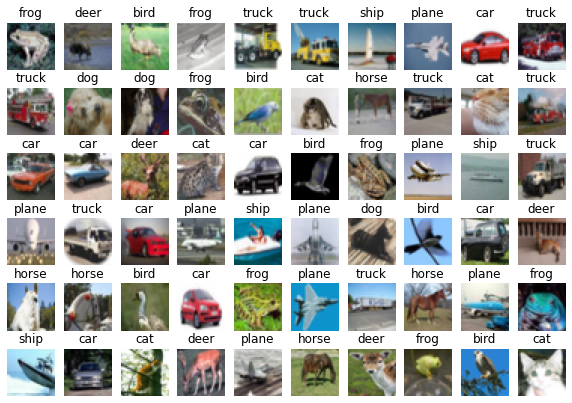

In [14]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
trainiter = iter(trainloader)
images, labels = next(trainiter)
fig = show_images(images, labels)